In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [45]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Check data retrieved from a test data logger installed in the field
--

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

**This cell is site specific**

In [47]:
# directory = './LowerTeMaari/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-08-10T00:20:00'

directory = './UpperTeMaari/'
csvfile = 'Table1.csv'
loggerfile = directory+csvfile
dtstart = '2018-08-28T00:30:00'

# directory = './Inferno/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2017-12-06T00:30:00'

# directory = './RuapehuCraterLake/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-05-04T04:00:00'

**Read data**

In [48]:
df = pd.read_csv(loggerfile, parse_dates=True, index_col = 'Datetime')

#Use only data after logger was installed
data = df[df.index>=dtstart]

In [49]:
data.tail()

,RecNbr,LoggerName,SupplyVolts,LithiumVolts,PTemp_degC,Temp_thermocouple1_degC,Temp_thermocouple2_degC,Temp_PRT_degC,nmbr_satellites_Avg
Datetime,,,,,,,,,
2018-09-04 00:50:00,1010,UpperTeMaari,14.15,3.671,7.550,8.62,8.61,73.989998,7.0
2018-09-04 01:00:00,1011,UpperTeMaari,14.12,3.671,7.634,8.68,8.70,92.000000,7.0
2018-09-04 01:10:00,1012,UpperTeMaari,14.14,3.670,7.726,8.75,8.76,74.160004,8.0
2018-09-04 01:20:00,1013,UpperTeMaari,14.12,3.672,7.830,8.73,8.80,73.959999,9.0
2018-09-04 01:30:00,1014,UpperTeMaari,14.17,3.672,7.956,8.84,8.91,86.599998,9.0


**Voltages**

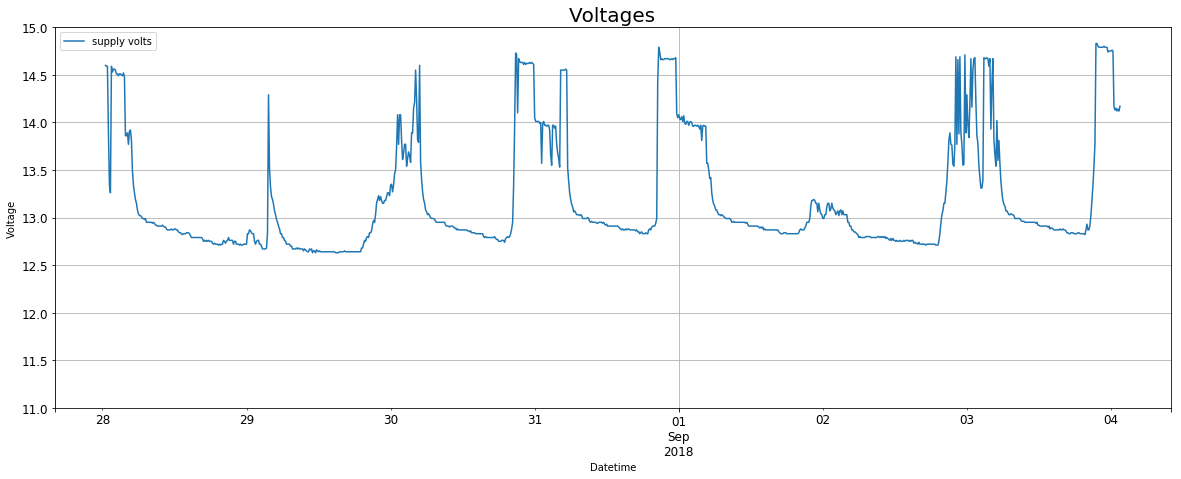

In [50]:
vol = data['SupplyVolts'].plot(figsize=(20,7), title='Voltages', label='supply volts', fontsize=12)
#data['LithiumVolts'].plot(ax=vol, label='lithium volts')
vol.title.set_size(20)
vol.grid()
vol.set_ylim(11,15)
vol.set_ylabel("Voltage")
vol.legend(loc='best')

In [51]:
fig = vol.get_figure()
fig.savefig(directory+'field_logger_voltage.png', dpi=100, bbox_inches='tight')

**Temperatures**

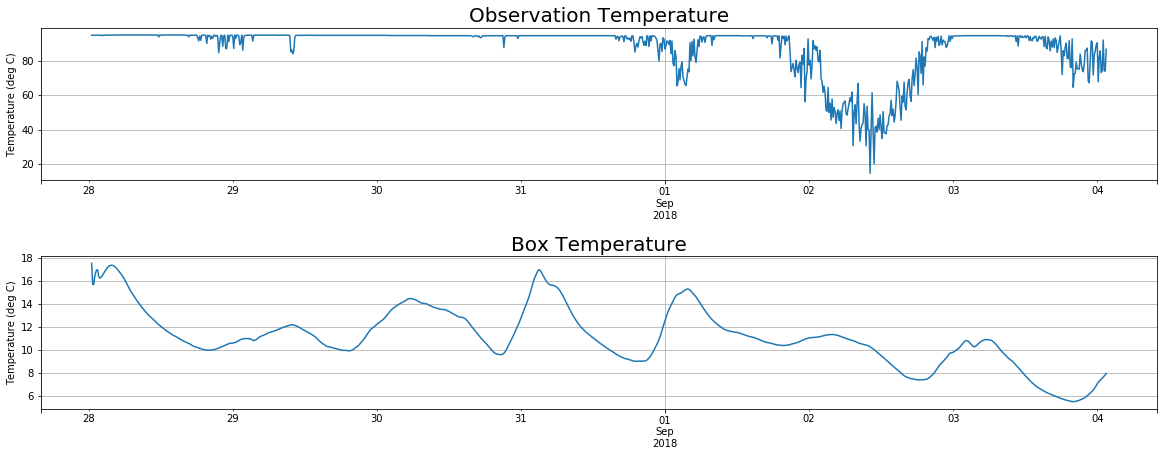

In [53]:
fig,(ax0,ax1) = plt.subplots(2, 1, figsize=(20,7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

data['Temp_PRT_degC'].plot(ax=ax0, title='Observation Temperature')
ax0.title.set_size(20)
ax0.grid()
ax0.set_ylabel('Temperature (deg C)')
ax0.set_xlabel('')

data['PTemp_degC'].plot(ax=ax1, title='Box Temperature')
ax1.title.set_size(20)
ax1.grid()
ax1.set_ylabel('Temperature (deg C)')
ax1.set_xlabel('');

fig.savefig(directory+'field_logger_temperature.png', dpi=100, bbox_inches='tight')

**Depth**

In [54]:
if (directory == './Inferno/' or directory == './RuapehuCraterLake/'):
    dep = data['Depth_USGS_OTT_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")

    fig = dep.get_figure()
    fig.savefig(directory+'field_logger_depth.png', dpi=100, bbox_inches='tight')

In [55]:
if directory == './Inferno/':
    data[data['Depth_USGS_OTT_meters']>12]